<b>Introduction</b>

This project intend to use KMeans clustering to compress an image.This  technique is based on paper published by Gersho and Gray in 1992 . It works by clustering similar pixels and representing  pixels in a cluster by cluster centroid, collection of centroids is called codebook. The process is also called as Vector Quantization(VQ) and the process is used for various signal compression. 

<b>Data</b>

Data is an image of my college DTU.



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import decomposition as dcmp
from sklearn import preprocessing as prep
from sklearn import cluster
import matplotlib.image as mpimg
from skimage.io import imread, imshow, imsave
import os

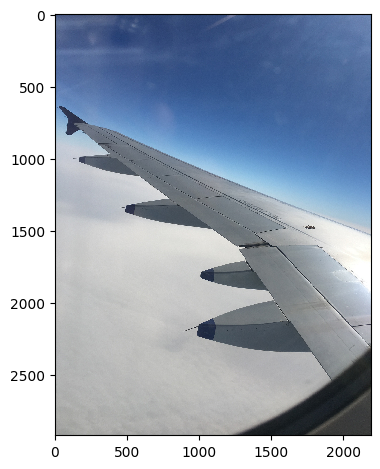

In [2]:
#Loading the data
wing=imread("wing.jpg")
#Displaying the image
imshow(wing)

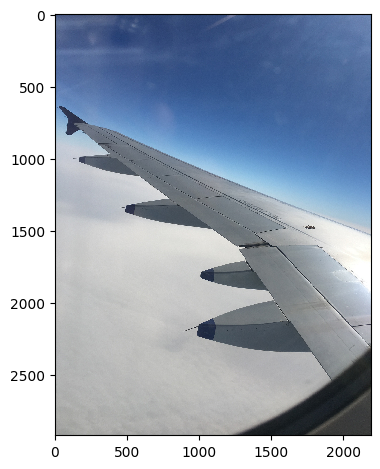

In [3]:
# Making the image compatible with matplotlib 
# Matplotlib represent RGB from value 0 to 1
wing_f64=wing.astype(dtype=np.float64)/255
#Ensuring conversion did not significantly alter the image
imshow(wing_f64)

In [4]:
# Determining the shape
wing_f64.shape

(2921, 2192, 3)

In [5]:
wing_f64.shape[2]

3

Unlike most dataset which is AxB matrix image is AxBxC matrix. In other word image is reprented by

(Height x Width x Pixels) matix. 

In [15]:
# Extracting pixel from data set
px_d=[] #Temporarily store the pixel after grabbing the pixel at a locaton
px_v=[] # Warehousing the pixels

for i in range(wing_f64.shape[0]):
    for j in range(wing_f64.shape[1]):
      
      
        for k in wing_f64[i, j,:]:
           
            px_d.append(k)
           
        px_v.append(px_d) #Storing the the pixel 
        px_d=[] #Empties the pixel to grab a new one
        
# Turning the data into an array
vArray=np.array(px_v)

# Turning the araray into feature vector

vArrayDF=pd.DataFrame(vArray, columns=['r', 'g', 'b'])
vArrayDF #Displaying the pixels

,r,g,b
0,0.243137,0.309804,0.478431
1,0.243137,0.309804,0.478431
2,0.243137,0.309804,0.478431
3,0.243137,0.309804,0.478431
4,0.239216,0.305882,0.474510
...,...,...,...
6402827,0.184314,0.184314,0.184314
6402828,0.231373,0.231373,0.231373
6402829,0.254902,0.254902,0.254902
6402830,0.239216,0.239216,0.231373


<b>K-Means Clustering</b>

In [23]:
km=cluster.KMeans(init='k-means++', n_clusters=100, n_init=10)
km.fit(vArrayDF)
ym=km.predict(vArrayDF)

<b> Generating codebook</b>

In [24]:
codebook=km.cluster_centers_


In [25]:
codebook

array([[0.21430828, 0.33739978, 0.54640638],
       [0.76355342, 0.76547796, 0.76284894],
       [0.4074716 , 0.50796696, 0.68604693],
       [0.21784563, 0.25069891, 0.3137327 ],
       [0.49852812, 0.51740805, 0.5279574 ],
       [0.56904683, 0.58906531, 0.6056731 ],
       [0.8685275 , 0.86884644, 0.85463582],
       [0.2580004 , 0.38216708, 0.58927627],
       [0.68864961, 0.69040158, 0.6904709 ],
       [0.40761931, 0.60157041, 0.80413242],
       [0.29627093, 0.33319334, 0.37034522],
       [0.28159619, 0.44173267, 0.66889691],
       [0.10648002, 0.12573768, 0.140199  ],
       [0.62400698, 0.78342759, 0.88885915],
       [0.42419883, 0.45263774, 0.47983817],
       [0.18113131, 0.26944986, 0.45633971],
       [0.97809492, 0.97380085, 0.9483439 ],
       [0.78248615, 0.78390482, 0.78095582],
       [0.7185729 , 0.72015475, 0.71805165],
       [0.33082518, 0.43602245, 0.62532666],
       [0.46378245, 0.65173511, 0.83092227],
       [0.83137834, 0.83386047, 0.83195381],
       [0.

<b>Building function to recreate image </b>

In [26]:
def recreate_image(codebook, labels, y, x):
    #Creating all zero 3 dimension matrix. Information from codebook will be used to generate the pixels
    image = np.zeros((y, x, codebook.shape[1])) 
    label_idx = 0
    for i in range(y):
        for j in range(x):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

<b>Recreating the image</b>

In [32]:
image=recreate_image(codebook, ym, wing_f64.shape[0], wing_f64.shape[1])
#Verifying the shape of image 
image.shape

(2921, 2192, 3)

Shape of the new image is same as the original.So we will display the image


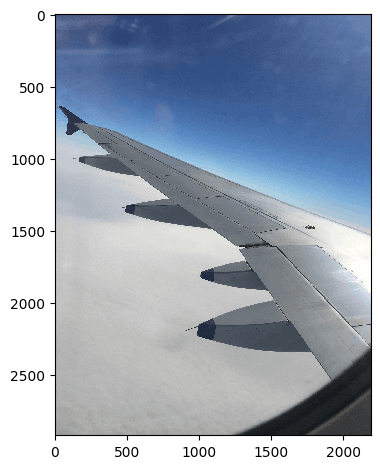

In [33]:
imshow(image)

In [29]:
from PIL import Image
image = Image.fromarray((image * 255).astype(np.uint8))

New image looks similar to the original image without significant loss of information.
We will now save the image onthe disk for validation. We will call new image dtu_compressed.jpg

In [30]:
image.save('wing_compressed.jpg')

<b>Validation</b>

In [31]:
origInal=os.path.getsize("wing.jpg")
compRessed=os.path.getsize("wing_compressed.jpg")
100*(origInal-compRessed)/origInal

60.01999198772225